In [13]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
who_data = pd.read_csv('C:\\Users\\josht\\Documents\\461\\cholera_data.csv')

In [15]:
def SIR_model(y, t, alpha, beta):
#The rate of re-infection is set to 0, 
#as cholera is reported to confer longterm immunity after infection:
#"cholerae infection resulted in 100% protection against reinfection 
#with either the homologous or heterologous serotype for at least 
#3 years—the longest interval tested" - Jason B Harris, Cholera: Immunity and Prospects in Vaccine Development
#https://academic.oup.com/jid/article/218/suppl_3/S141/5089248
    
    S, I, R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - alpha*I 
    dRdt = alpha*I
    
    return dSdt, dIdt, dRdt

In [73]:
N = 44970000 #South African population in 2000, according to https://data.worldbank.org/indicator/SP.POP.TOTL?locations=ZA

I0 = who_data.iloc[0, 0] / N
S0 = (N - I0)  / N
R0 = 22 / N
alpha = 0.0006 
beta = 0.185 


t = np.linspace(0, 20, 20)

In [74]:
sol = np.array(odeint(SIR_model, [S0, I0, R0], t, args=(alpha, beta)))

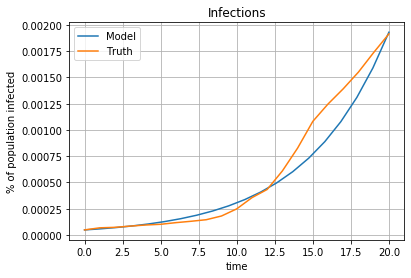

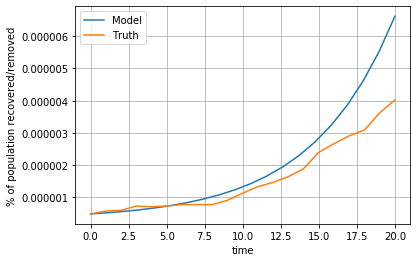

In [75]:
plt.figure(figsize = [6, 4])
#plt.plot(t, sol[:, 0], label = "S(t)")
plt.plot(t, sol[:, 1], label = "Model")

plt.plot(who_data.iloc[:, 0] / N, label = "Truth") 

plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("% of population infected")
plt.title("Infections")
plt.show()

plt.figure(figsize = [6, 4])
#plt.plot(t, sol[:, 0], label = "S(t)")
plt.plot(t, sol[:, 2], label = "Model")

plt.plot(who_data.iloc[:, 1] / N, label = "Truth") 

plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("% of population recovered/removed")
plt.show()

NOTE: Since the data given are only reporting deaths, and the model is accounting for both deaths and recoveries, we should expect the the model to report higher values.